# Машинное обучение

**Цель:** Предсказание популярности поста сообщества интернет магазина "Одежда LolySweet Shop" (метрика популярности likes) в зависмости от характеристик публикуемого поста.

**Польза:** Данная модель позволит предсказывать популярность поста, что позволит владельцам сообщества форсмировать посты и пуюликовать их таким образом, чтобы оватить наибольшее количество людей и привлечь как можно больше потенциальных покупателей в свой магазин.

**Реализация:** 
* Будут использованы следующие модели машинного обучения: наивный прогноз, линейная регрессия, Ridge-регрессия, lasso-регрессия, Random Forest
* Целевая переменная: likes
* Зависимые переменные: reposts, views, comments, catalog_category, price_category, time_category

Подгружаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подгружаем датафрейм.

In [2]:
data=pd.read_csv('analysi.csv')
data

,Unnamed: 0,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category,price_category
0,0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,12:00:00,дневное,средний
1,1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,07:00:00,утреннее,средний
2,2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,10:00:00,утреннее,средний
3,3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,08:00:00,утреннее,средний
4,4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,06:00:00,утреннее,средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1211,17.02.2023,30,31,11002,0,Платье-свитер в полосочку на молнии,2390,платья,платья,02:00:00,ночное,средний
1212,1212,16.02.2023,28,36,8779,0,Тройной купальник с высокой посадкой,1690,купальники,купальники,23:00:00,ночное,дешёвый
1213,1213,16.02.2023,35,35,10657,2,Комплект с юбкой и джемпером,3290,платья,платья,20:00:00,вечернее,дорогой
1214,1214,16.02.2023,20,22,12509,0,Боди с ассиметричным вырезом,1550,боди,блузки/рубашки/свитера,15:00:00,дневное,дешёвый


In [3]:
data = data.drop(columns=['Unnamed: 0'])
data

,date,likes,reposts,views,comments,name,price,product_category,catalog_category,time,time_category,price_category
0,11.04.2024,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590,платья,платья,12:00:00,дневное,средний
1,11.04.2024,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690,платья,платья,07:00:00,утреннее,средний
2,09.04.2024,40,35,9721,0,Хлопковые костюмы с жилетом,2690,костюмы,комплекты,10:00:00,утреннее,средний
3,09.04.2024,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550,платья,платья,08:00:00,утреннее,средний
4,09.04.2024,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550,платья,платья,06:00:00,утреннее,средний
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,17.02.2023,30,31,11002,0,Платье-свитер в полосочку на молнии,2390,платья,платья,02:00:00,ночное,средний
1212,16.02.2023,28,36,8779,0,Тройной купальник с высокой посадкой,1690,купальники,купальники,23:00:00,ночное,дешёвый
1213,16.02.2023,35,35,10657,2,Комплект с юбкой и джемпером,3290,платья,платья,20:00:00,вечернее,дорогой
1214,16.02.2023,20,22,12509,0,Боди с ассиметричным вырезом,1550,боди,блузки/рубашки/свитера,15:00:00,дневное,дешёвый


# Предварительная подготовка данных

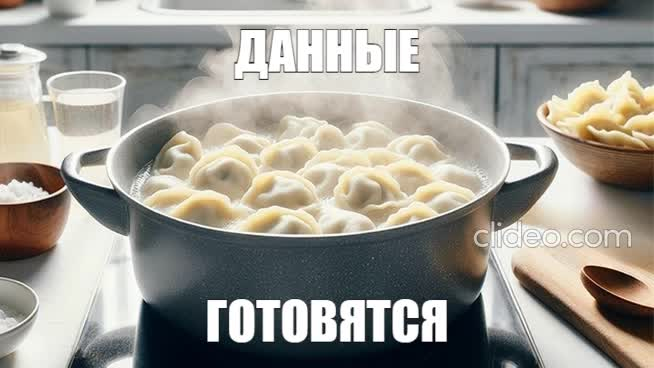

В рамках предварительной подготовки мы проведем:
   - OHE для преобразования данных категориального формата в числовой 
   - разбиение выборки на обучающую и тестовую для дальнейшего ML
   - оценить необходимость масштабирования признаков и провести его, если потребуется

Для начала удалим столбцы date, name, price, product_category и time из исходного датафрейма, поскольку time был выделен в отдельную категориальную группу time_category и name в категорию catalog_category через product_category, чтобы избежать повторного учёта в процессе машинного обучения. В признаке date не было выявлено явных зависимостей, которые могли бы влиять на целевую переменную. C переменной price не было выявленно сильной корреляции в явном виде, поэтому на предыдущих шагах этот столбец был оптимизирован в price_category.

In [4]:
data1=data.drop(columns=['date', 'time', 'name', 'price','product_category'])
data1

,likes,reposts,views,comments,catalog_category,time_category,price_category
0,29,28,7411,3,платья,дневное,средний
1,23,19,4581,0,платья,утреннее,средний
2,40,35,9721,0,комплекты,утреннее,средний
3,37,21,6313,0,платья,утреннее,средний
4,35,22,10655,0,платья,утреннее,средний
...,...,...,...,...,...,...,...
1211,30,31,11002,0,платья,ночное,средний
1212,28,36,8779,0,купальники,ночное,дешёвый
1213,35,35,10657,2,платья,вечернее,дорогой
1214,20,22,12509,0,блузки/рубашки/свитера,дневное,дешёвый


Для проведения OHE воспользуемся функцией get_dummies.

In [5]:
edata=pd.get_dummies(data1)
edata

,likes,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
0,29,28,7411,3,0,0,0,0,0,1,0,1,0,0,0,0,1
1,23,19,4581,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,40,35,9721,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,37,21,6313,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,35,22,10655,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,30,31,11002,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1212,28,36,8779,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1213,35,35,10657,2,0,0,0,0,0,1,1,0,0,0,0,1,0
1214,20,22,12509,0,1,0,0,0,0,0,0,1,0,0,1,0,0


Теперь разобъём выборку на обучающую и тесстовую в соотношении: обучающая = 80% и тестовая = 20%.

In [6]:
X = edata.iloc[:, 1:]
y = edata.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
X

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
0,28,7411,3,0,0,0,0,0,1,0,1,0,0,0,0,1
1,19,4581,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,35,9721,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,21,6313,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,22,10655,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,31,11002,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1212,36,8779,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1213,35,10657,2,0,0,0,0,0,1,1,0,0,0,0,1,0
1214,22,12509,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [8]:
y

0       29
1       23
2       40
3       37
4       35
        ..
1211    30
1212    28
1213    35
1214    20
1215    43
Name: likes, Length: 1216, dtype: int64

В STEP4 было показано, что признаки views, comments и reposts не подчинены закону нормального распределения и в своём распределении имеют ассиметрию, характеризующуюся наличием выбросов на правом хвосте, поэтому в данной ситуации необходимо провести масштабирование признаков. Для масштабирования вомпользуемся логарифмическим масштабирование, чтобы приблизить данные к нормальному распределению.

In [9]:
log_data = X_train[['reposts', 'views', 'comments']].apply(lambda x: np.log(x))
#объединим отмасштабированные столбцы числовых признаков с категориальными
X_train_l=pd.concat([log_data, X_train.iloc[:, 3:]], axis=1)
X_train_l

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
602,3.367296,9.624699,-inf,0,0,0,1,0,0,0,0,0,1,0,1,0
1109,2.890372,9.718001,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,1
1083,3.555348,9.773777,-inf,0,0,0,0,0,1,0,0,1,0,0,0,1
204,3.871201,9.291459,-inf,0,0,0,1,0,0,0,0,0,1,1,0,0
1068,2.995732,9.503234,-inf,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1.791759,8.579980,-inf,0,0,0,1,0,0,0,0,1,0,1,0,0
368,3.433987,9.632335,-inf,1,0,0,0,0,0,1,0,0,0,0,0,1
48,2.564949,8.819222,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,1
772,4.574711,9.903238,0.693147,0,0,0,0,0,1,1,0,0,0,0,0,1


Повторим для тестовой выборки.

In [10]:
log_data1 = X_test[['reposts', 'views', 'comments']].apply(lambda x: np.log(x))
#объединим отмасштабированные столбцы числовых признаков с категориальными
X_test_l=pd.concat([log_data1, X_test.iloc[:, 3:]], axis=1)
X_test_l

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
919,4.304065,9.739497,-inf,0,0,0,1,0,0,0,1,0,0,0,0,1
1021,2.890372,9.360655,-inf,0,0,0,1,0,0,0,1,0,0,0,0,1
970,4.369448,9.505321,-inf,0,0,0,1,0,0,0,0,1,0,0,0,1
885,2.079442,9.268609,-inf,0,0,0,0,0,1,0,0,0,1,0,0,1
819,3.218876,9.760367,-inf,1,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,3.912023,9.725974,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0
710,3.688879,9.881037,-inf,0,0,0,1,0,0,0,0,0,1,1,0,0
266,3.401197,9.547669,-inf,1,0,0,0,0,0,0,0,0,1,1,0,0
234,2.890372,8.832879,-inf,0,0,0,1,0,0,0,1,0,0,1,0,0


Из-за наличия нулевых значений в столбце comments после масштабирования появились значения -inf, заменим такие значения на среднее по столбцу comments во избежани ошибок при моделировании.

In [11]:
X_train_l.replace(-np.inf, np.nan, inplace=True)
X_train_l.fillna(X_train_l.mean(), inplace=True)
X_train_l

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
602,3.367296,9.624699,0.728926,0,0,0,1,0,0,0,0,0,1,0,1,0
1109,2.890372,9.718001,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,1
1083,3.555348,9.773777,0.728926,0,0,0,0,0,1,0,0,1,0,0,0,1
204,3.871201,9.291459,0.728926,0,0,0,1,0,0,0,0,0,1,1,0,0
1068,2.995732,9.503234,0.728926,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1.791759,8.579980,0.728926,0,0,0,1,0,0,0,0,1,0,1,0,0
368,3.433987,9.632335,0.728926,1,0,0,0,0,0,1,0,0,0,0,0,1
48,2.564949,8.819222,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,1
772,4.574711,9.903238,0.693147,0,0,0,0,0,1,1,0,0,0,0,0,1


In [12]:
X_test_l.replace(-np.inf, np.nan, inplace=True)
X_test_l.fillna(X_test_l.mean(), inplace=True)
X_test_l

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
919,4.304065,9.739497,0.62174,0,0,0,1,0,0,0,1,0,0,0,0,1
1021,2.890372,9.360655,0.62174,0,0,0,1,0,0,0,1,0,0,0,0,1
970,4.369448,9.505321,0.62174,0,0,0,1,0,0,0,0,1,0,0,0,1
885,2.079442,9.268609,0.62174,0,0,0,0,0,1,0,0,0,1,0,0,1
819,3.218876,9.760367,0.62174,1,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,3.912023,9.725974,0.00000,0,0,0,1,0,0,1,0,0,0,0,1,0
710,3.688879,9.881037,0.62174,0,0,0,1,0,0,0,0,0,1,1,0,0
266,3.401197,9.547669,0.62174,1,0,0,0,0,0,0,0,0,1,1,0,0
234,2.890372,8.832879,0.62174,0,0,0,1,0,0,0,1,0,0,1,0,0


Далее мы будем использовать следующие полученные выборки для машинного обучения: X_train_l, X_test_l, y_train, y_test.

Предварительная обработка окончена!

# Метрики качества моделей

Для оценки качества моделей будем использовать такие метрики, как **MSE, MAE, R^2**. По ним будет производится сравнение моделей.

* MSE: измеряет срнеквадратичное отклонение предсказанных значений от истинных, позволит минимизировать большие ошибки.
* MAE: измеряет средний модуль отклонения предсказанных значений от истинных, менее чувствителен к выбросам, чем MSE.
* R^2: используется для оценки соответствия модели данным, позволит оценить, насколько хорошо модель объясняет изменчивость данных.

**Цель для успешной модели:** минимизация ошибок MSE и MAE и максимизация R^2.

# Визуализация прогнозов

Напишем функцию, которая позволит визуализировать прогнозы моделей на тренировочной и тестовой выборках.

In [13]:
def plot_builder(y_test, y_train, y_pred_test, y_pred_train, name):
    """
    Функция принимает значения для тестовой и для обучающей выборки, строит по ним график

    Parameters
    ----------
    y_test, y_train, y_pred_test, y_pred_train : array
        Значения по которым стироим график
    name: text
        Наименование модели
    Returns
    -------
    plot
        Графики, по которым следует анализировать работу обучающей модели
    """
    plt.figure(figsize=(10,5), dpi=300)

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_pred_train, color="hotpink", alpha=0.5, label='Предсказания')
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title(f'График истинных и предсказанных значений\nмодели "{name}" на тренировочной выборке', fontsize=10) 
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 
             color='black', label='Идеальная линия')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_test, color="coral", alpha=0.5, label='Предсказания')
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
             color='black', label='Идеальная линия')
    plt.legend()
    plt.title(f'График истинных и предсказанных значений\nмодели "{name}" на тестовой выборке', fontsize=10) 

    plt.tight_layout()  
    plt.show()

# Обучение моделей

# Наивный прогноз

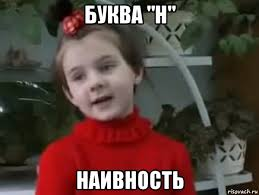

Предскажем популярность постов, измеряюемую в лайках при помощи наивного прогноза, рассчитываемом на основе предположения о том, что прогнозные значения будут равны среднему значению по выборке.

**Недостатки наивного прогноза:**
* чувствителен к выбросам
* не улавливает сложные зависимости
* не учитывает тренды в данных

In [14]:
y_naive = y_train.mean()*np.ones(y_test.shape)
y_naive[0]

67.81584362139918

In [15]:
y_naive_1 = y_train.mean()*np.ones(y_train.shape)
y_naive_1[0]

67.81584362139918

Рассчитаем метрики качества для наивного прогноза.

In [16]:
mean_squared_error(y_test, y_naive).round(3)

3704.373

In [17]:
mean_squared_error(y_train, y_naive_1).round(3)

9398.385

In [18]:
mean_absolute_error(y_test, y_naive).round(3)

38.405

In [19]:
mean_absolute_error(y_train, y_naive_1).round(3)

45.531

In [20]:
r2_score(y_test, y_naive).round(3)

-0.016

In [21]:
r2_score(y_train, y_naive_1).round(3)

0.0

По результатам метрики R^2 уже на этом этапе можно сказать, что модель не объясняет изменчивость данных, вариацию целевой переменной и делает предсказание хуже простых, базовых методов, поэтому скорее всего проведение наивного прогноза не самый удачный вариант для реализации поставленной цели по предсказанию популярности постов.

Визуализируем полученные результаты обучения на тренировочной и тестовой выборке.

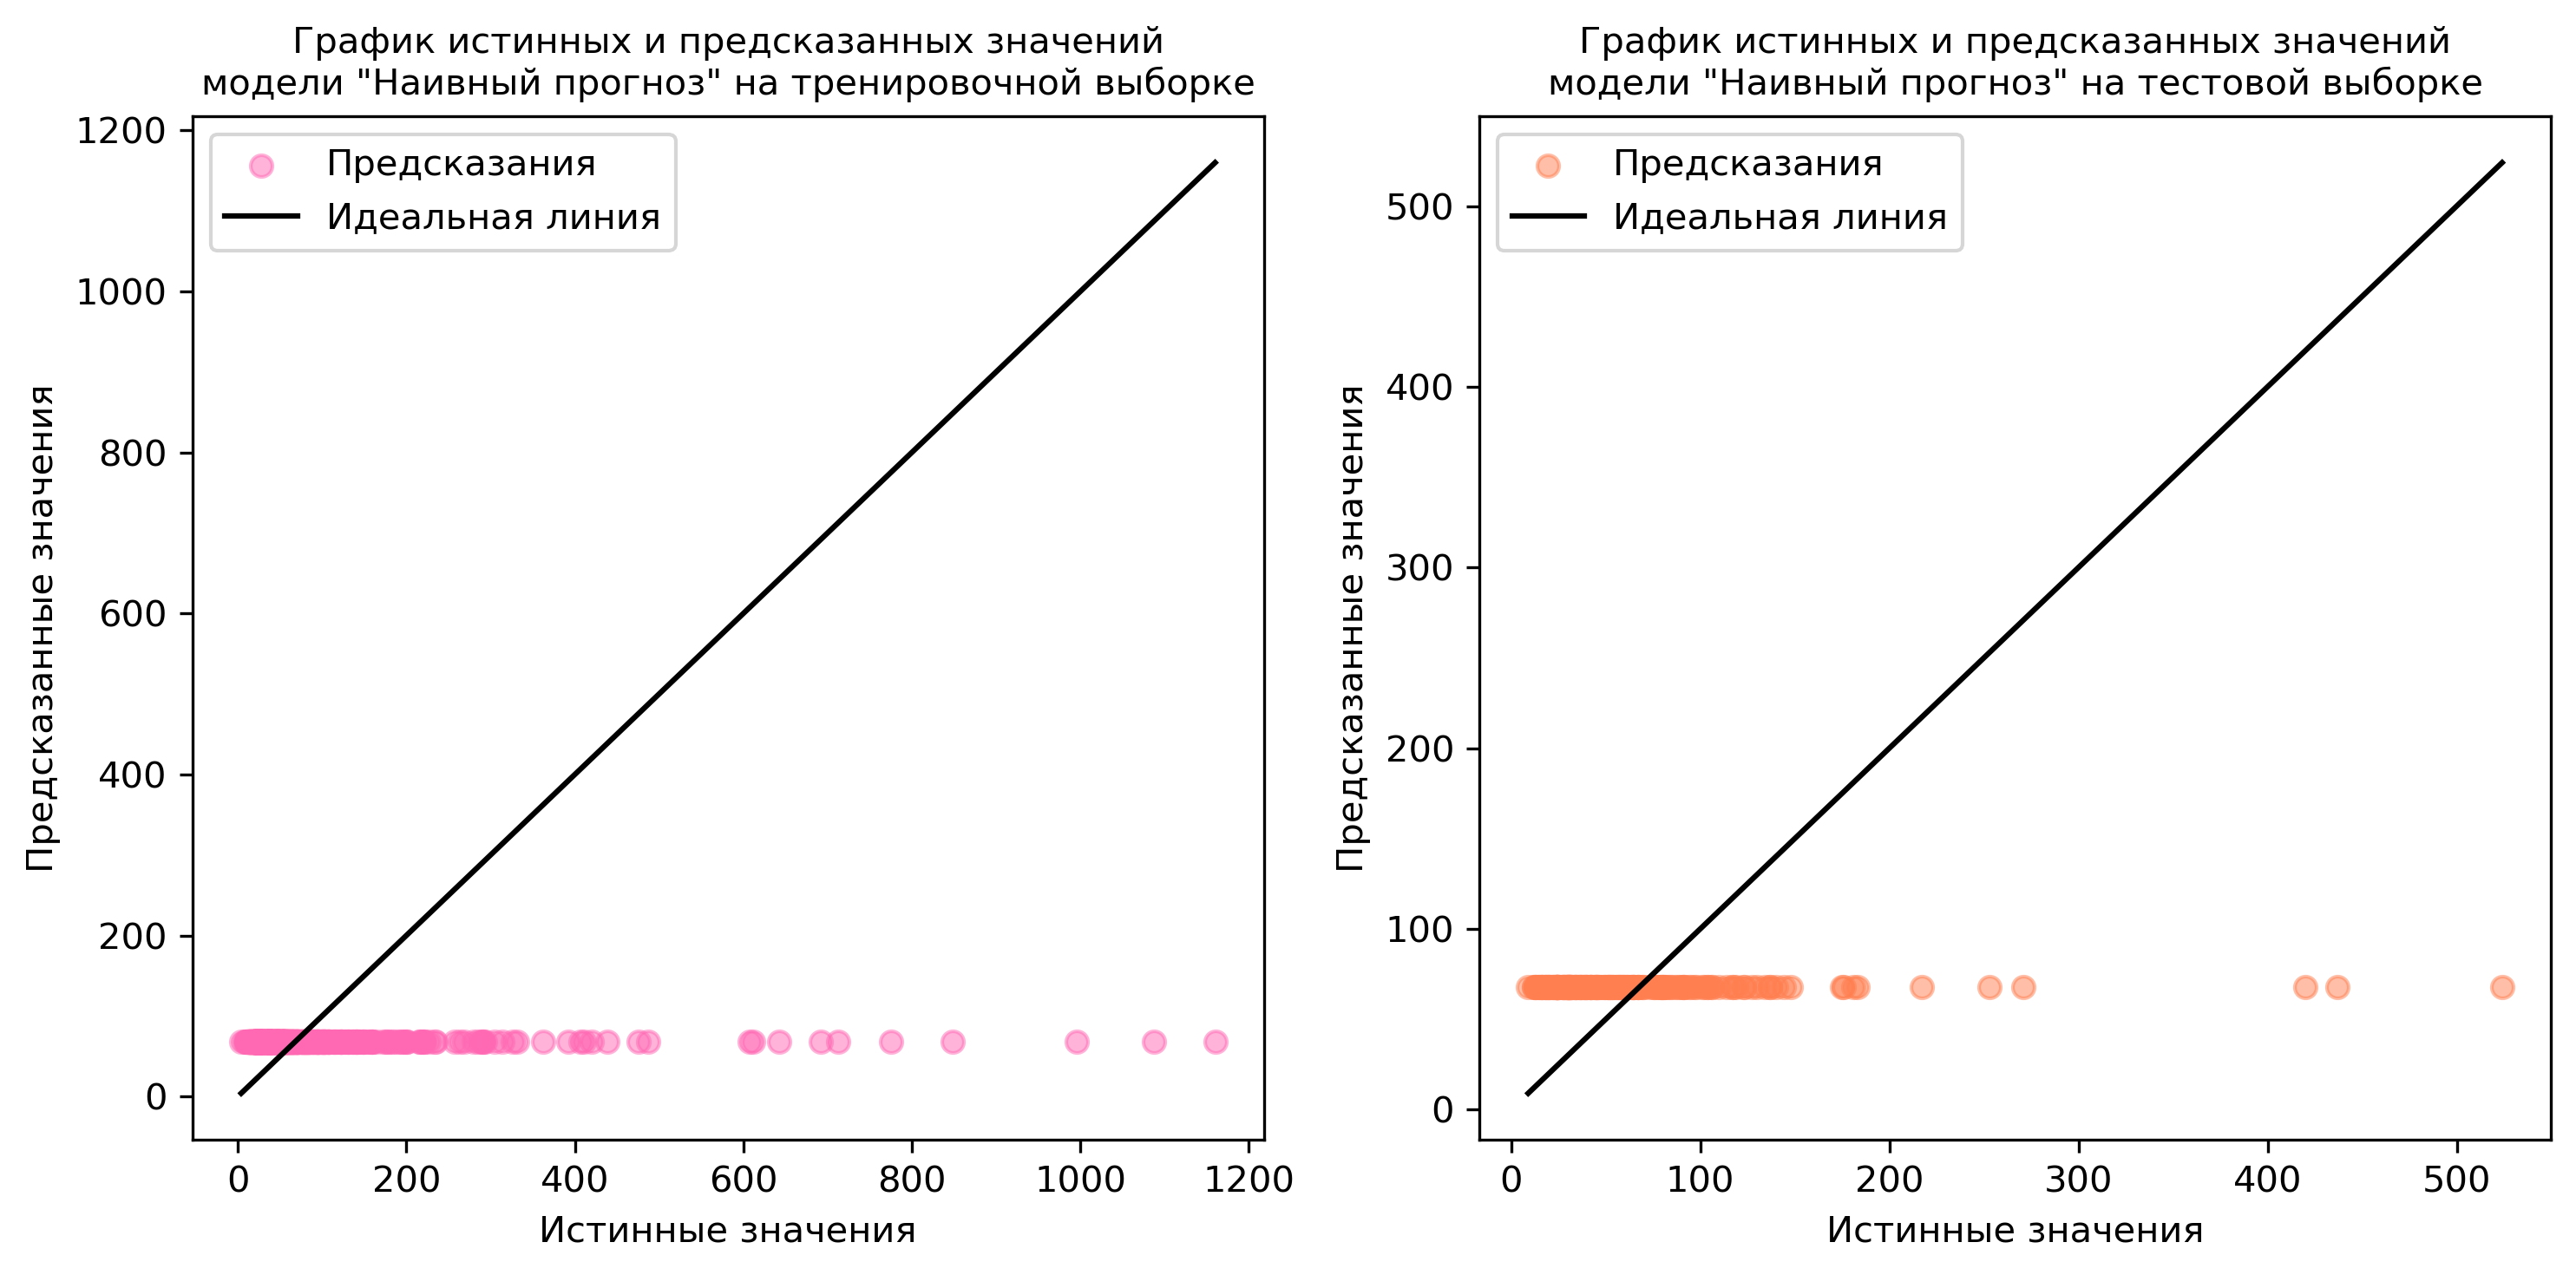

In [22]:
plot_builder(y_test,y_train,y_naive,y_naive_1,"Наивный прогноз")

Результаты по метрикам на тренировочной и тестовой выборках.

**Тренировочная выборка:**
    
   * MSE: 9398.385
   * MAE: 45.531
   * R^2: 0.0
   
**Тестовая выборка:**
    
   * MSE: 3704.373
   * MAE: 38.405
   * R^2: -0.016

Модель плохо справляется с новыми данными.

# Линейная регрессия

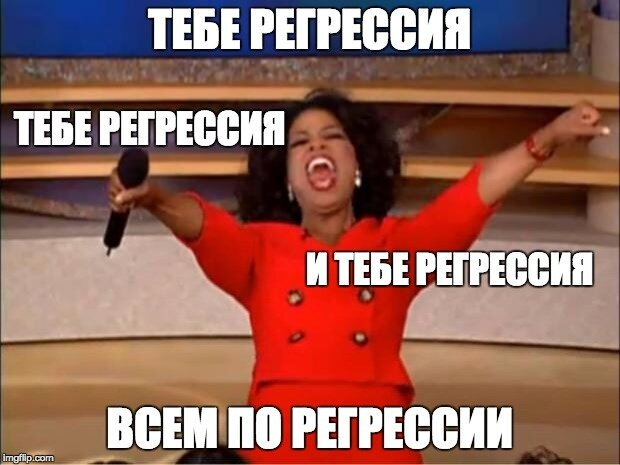

Мы будем использовать **линейную регрессию** для прогнозирования значения нашей зависимой переменной (`likes`) на основе наших переменных 

**Преимущества линейной регрессии**:
- *Простота* модели в использовании
- Возможность оценки *степени влияния каждой переменной на зависимую*
- Хорошая *интерпретируемость и понятность результатов*

**Недостатки линейной регрессии:**
- Предполагает *линейную зависимость* между переменными, что может быть не всегда справедливо
- *Чувствительна к выбросам* 

In [23]:
#импортируем модуль линейной регрессии
from sklearn.linear_model import LinearRegression

In [24]:
#объявляем модель
lin_reg = LinearRegression()

In [25]:
#обучаем модель
lin_reg.fit(X_train_l, y_train)

LinearRegression()

In [26]:
#предскажем значения y_test 
y_pred_lin_reg = lin_reg.predict(X_test_l)

#предскажем значения y_train
y_pred_lin_reg_t = lin_reg.predict(X_train_l)

Расчитаем метрики качества для нашей модели

In [27]:
mean_squared_error(y_test, y_pred_lin_reg).round(3)

1730.251

In [28]:
mean_squared_error(y_train, y_pred_lin_reg_t).round(3)

3472.885

In [29]:
mean_absolute_error(y_test, y_pred_lin_reg).round(3)

31.102

In [30]:
mean_absolute_error(y_train, y_pred_lin_reg_t).round(3)

33.043

In [31]:
r2_score(y_test, y_pred_lin_reg).round(3)

0.525

In [32]:
r2_score(y_train, y_pred_lin_reg_t).round(3)

0.63

Визуализируем нашу модель

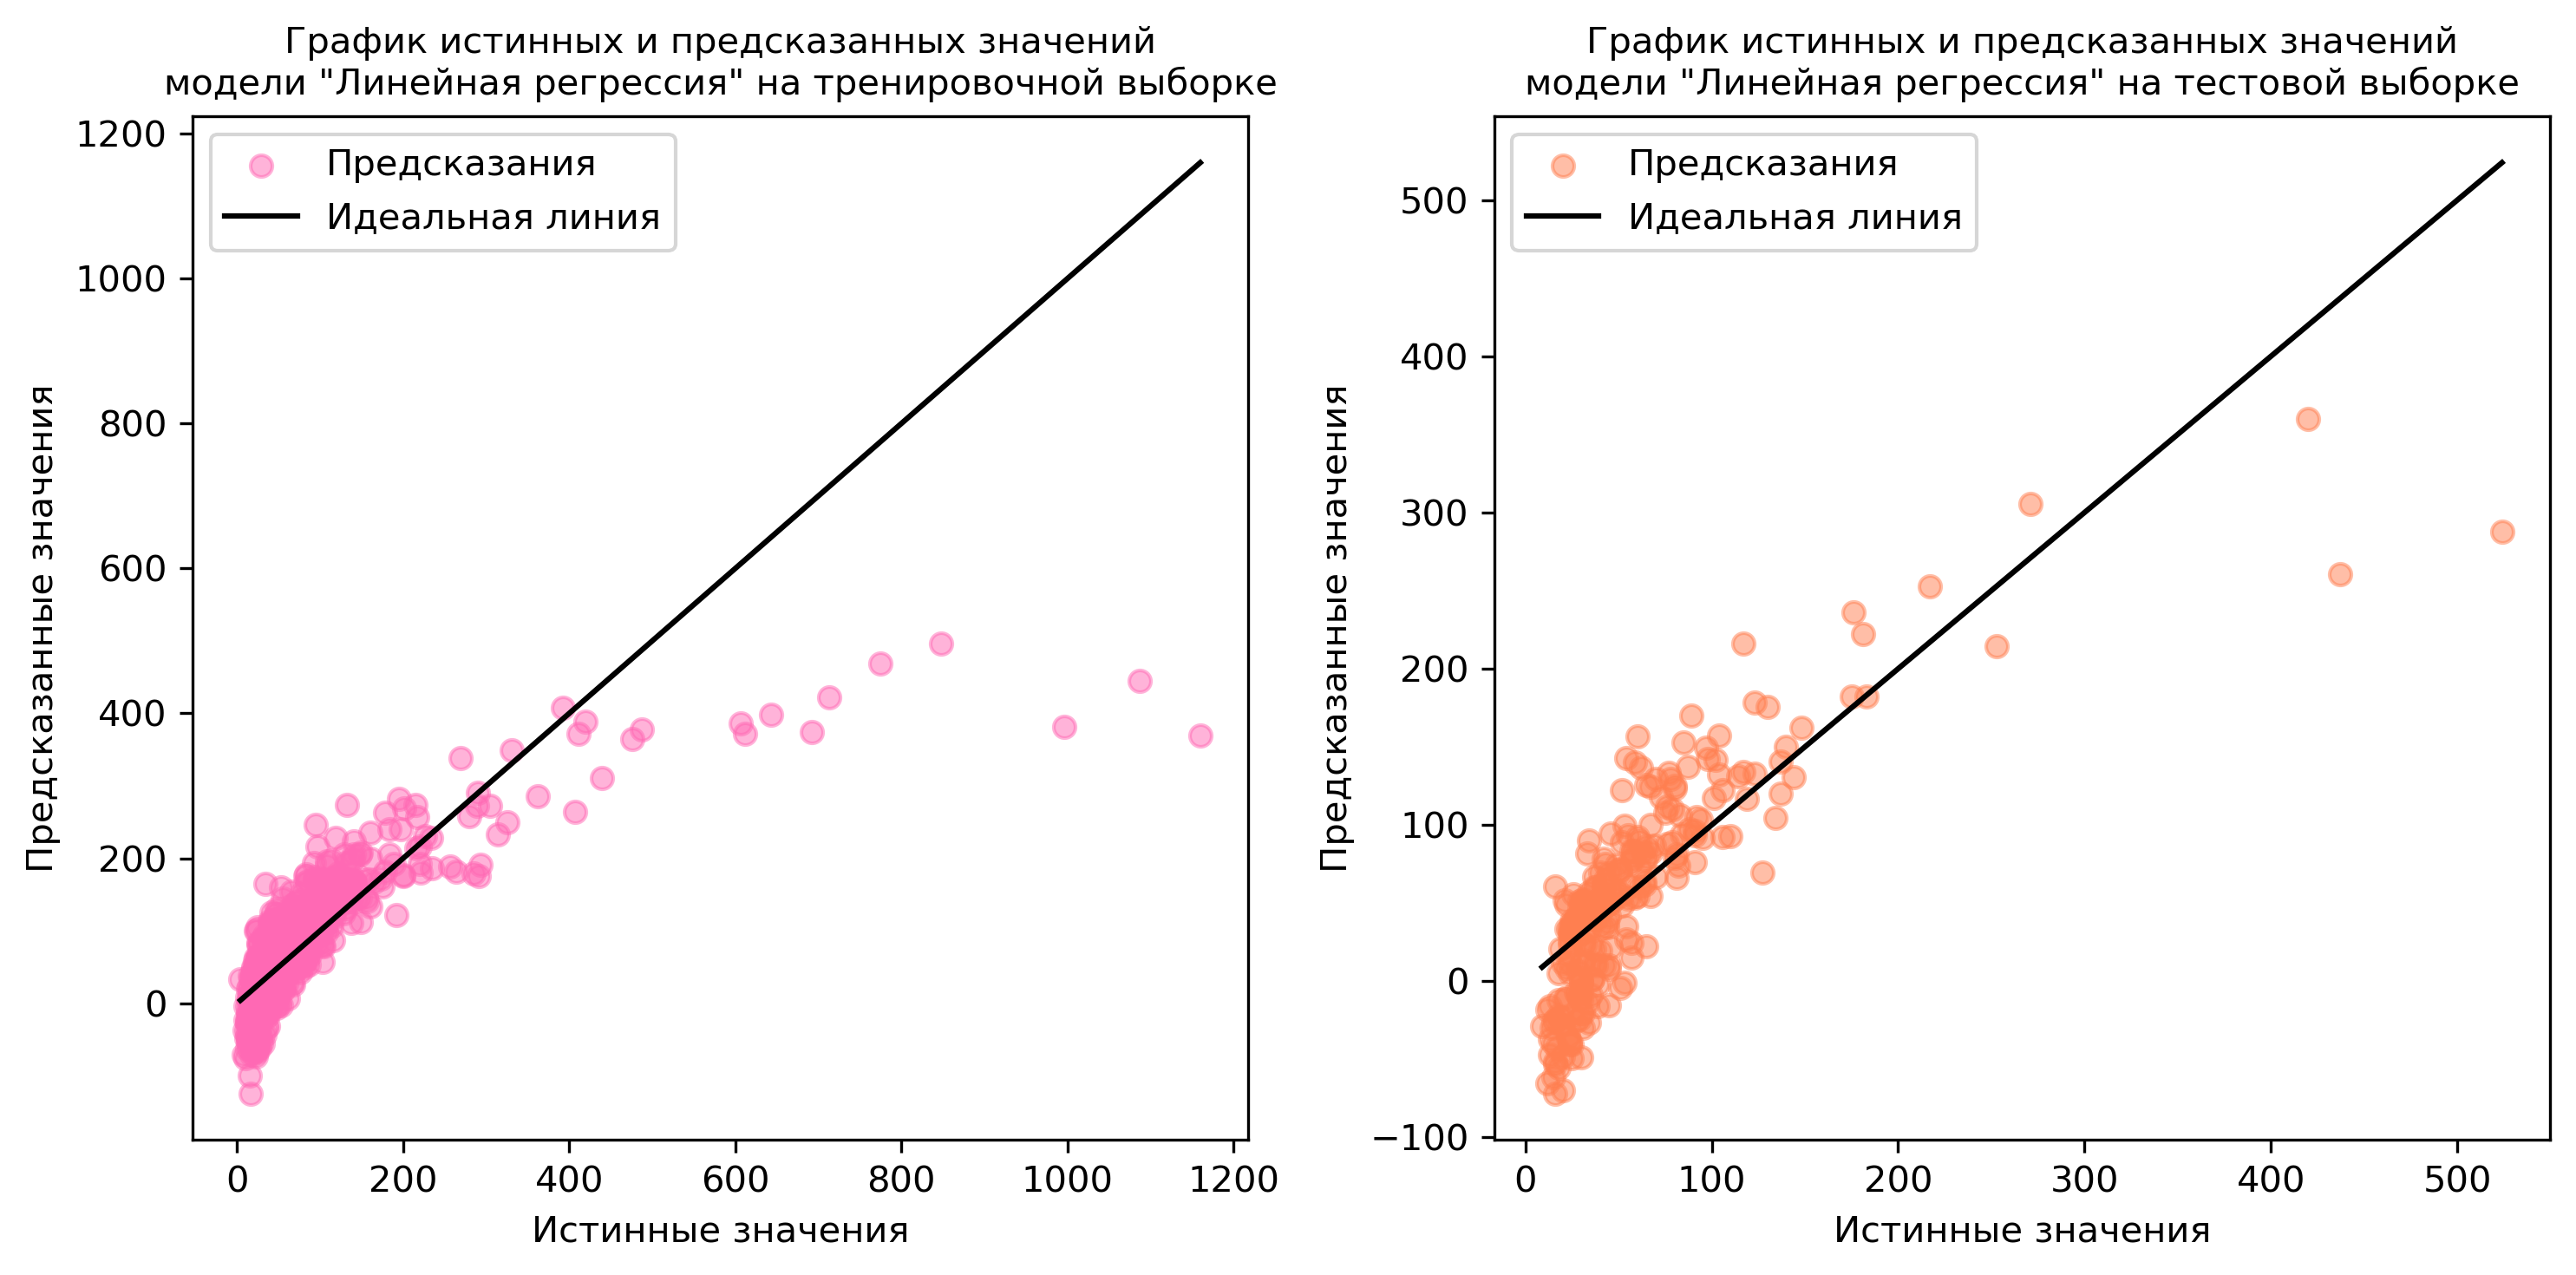

In [33]:
plot_builder(y_test, y_train, y_pred_lin_reg, y_pred_lin_reg_t, "Линейная регрессия")

**Метрики качества для `тренировочной выборки`:**
- `MSE` = 3478.25
- `MAE` = 33.03
- `R2` = 0.63

**Метрики качества для `тестовой выборки`:**
- `MSE` = 1734.69
- `MAE` = 31.09
- `R2` = 0.52

**Вывод**: модель справляется с данными лучше, чем наивный прогноз. Посмотрим, как справятся другие модели

# Ridge - регрессия

Ridge-регрессия - это метод линейной регрессии, который позволяет бороться с мультиколлинеарностью и переобучением. Она добавляет штраф к функции потерь в виде квадрата L2-нормы весов модели, что помогает предотвратить слишком большие коэффициенты и делает модель более устойчивой.

**Недостатки Ridge-регрессии:**
* возможное смещение оценок коэффициентов
* не позволяет отобрать значимые признаки как, например в Lasso-регрессии
* необходимо правильно подобрать параметр регуляризации

In [34]:
r = Ridge()

Зададим диапазон значений параметра регуляризации alpha.

In [35]:
alphas = np.arange(0.1, 100, 1)
a = {'alpha': alphas}

Используем GridSearchCV для подбора оптимального значения alpha с помощью кросс-валидации, но перед кросс-валидацией масштабируем X, поскольку при разбиении выборки на обучающую и тестовую мы отдельно масштабировали X_train и X_test.

In [36]:
X_norm = X[['reposts', 'views', 'comments']].apply(lambda x: np.log(x))
#объединим отмасштабированные столбцы числовых признаков с категориальными
X_norm_1=pd.concat([X_norm, X.iloc[:, 3:]], axis=1)
X_norm_1

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
0,3.332205,8.910721,1.098612,0,0,0,0,0,1,0,1,0,0,0,0,1
1,2.944439,8.429673,-inf,0,0,0,0,0,1,0,0,0,1,0,0,1
2,3.555348,9.182044,-inf,0,0,0,1,0,0,0,0,0,1,0,0,1
3,3.044522,8.750366,-inf,0,0,0,0,0,1,0,0,0,1,0,0,1
4,3.091042,9.273785,-inf,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,3.433987,9.305832,-inf,0,0,0,0,0,1,0,0,1,0,0,0,1
1212,3.583519,9.080118,-inf,0,0,0,0,1,0,0,0,1,0,1,0,0
1213,3.555348,9.273972,0.693147,0,0,0,0,0,1,1,0,0,0,0,1,0
1214,3.091042,9.434204,-inf,1,0,0,0,0,0,0,1,0,0,1,0,0


In [37]:
X_norm_1.replace(-np.inf, np.nan, inplace=True)
X_norm_1.fillna(X_norm_1.mean(), inplace=True)
X_norm_1

,reposts,views,comments,catalog_category_блузки/рубашки/свитера,catalog_category_брюки/комбинезоны/джинсы,catalog_category_верхняя одежда,catalog_category_комплекты,catalog_category_купальники,catalog_category_платья,time_category_вечернее,time_category_дневное,time_category_ночное,time_category_утреннее,price_category_дешёвый,price_category_дорогой,price_category_средний
0,3.332205,8.910721,1.098612,0,0,0,0,0,1,0,1,0,0,0,0,1
1,2.944439,8.429673,0.708447,0,0,0,0,0,1,0,0,0,1,0,0,1
2,3.555348,9.182044,0.708447,0,0,0,1,0,0,0,0,0,1,0,0,1
3,3.044522,8.750366,0.708447,0,0,0,0,0,1,0,0,0,1,0,0,1
4,3.091042,9.273785,0.708447,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,3.433987,9.305832,0.708447,0,0,0,0,0,1,0,0,1,0,0,0,1
1212,3.583519,9.080118,0.708447,0,0,0,0,1,0,0,0,1,0,1,0,0
1213,3.555348,9.273972,0.693147,0,0,0,0,0,1,1,0,0,0,0,1,0
1214,3.091042,9.434204,0.708447,1,0,0,0,0,0,0,1,0,0,1,0,0


Найдём наилучший параметр регуляризации.

In [38]:
grid_explore = GridSearchCV(r, a, cv=5)
grid_explore.fit(X_norm_1, y)
grid_explore.best_params_

{'alpha': 99.1}

С учётом найденного оптимального параметра alpha обучим модель.

In [39]:
rid = Ridge(alpha=99.1)  
rid.fit(X_train_l, y_train)
y_pred = rid.predict(X_test)

In [40]:
y_pred_t=rid.predict(X_train)

Посчитаем метрики качества для модели.

In [41]:
mean_squared_error(y_test, y_pred).round(3)

976635596216.205

In [42]:
mean_squared_error(y_train, y_pred_t).round(3)

1627247450050.119

In [43]:
mean_absolute_error(y_test, y_pred).round(3)

809059.726

In [44]:
mean_absolute_error(y_train, y_pred_t).round(3)

914355.019

In [45]:
r2_score(y_test, y_pred).round(3)

-267928928.637

In [46]:
r2_score(y_train, y_pred_t).round(3)

-173141180.472

Модель очень плохо работает с данными. Попробуем взять очень большое значение параметра alpha.

In [47]:
rid_1 = Ridge(alpha=100000000)  
rid_1.fit(X_train_l, y_train)
y_pred_1 = rid_1.predict(X_test)

In [48]:
y_train_1=rid_1.predict(X_train)

Пересчитаем теперь метрики качества

In [49]:
mean_squared_error(y_test, y_pred_1)

3387.0114653948344

In [50]:
mean_squared_error(y_train, y_train_1).round(3)

8257.114

In [51]:
mean_absolute_error(y_test, y_pred_1).round(3)

39.568

In [52]:
mean_absolute_error(y_train, y_train_1).round(3)

46.243

In [53]:
r2_score(y_test, y_pred_1).round(3)

0.071

In [54]:
r2_score(y_train, y_train_1).round(3)

0.121

Теперь модель лучше справляется с данными, но все равно не очень хорошо их описывает.Также есть недостаток в занижении весов параметров из-за большого значения alpha. Попробуем теперь проделать эти процедуры на немасштабированных данных.

In [55]:
grid_explore = GridSearchCV(r, a, cv=5)
grid_explore.fit(X, y)
grid_explore.best_params_

{'alpha': 99.1}

Значение alpha не изменилось относительно изначального, значит проблема не в масштабировании, а в соответствии модели данным.

**Тренировочная выборка:**
    
   * MSE: 8257.114224695852
   * MAE: 46.24305818416394
   * R^2: 0.07081171308173284
   
**Тестовая выборка:**
    
   * MSE: 3387.0114653948344
   * MAE: 39.56831658385341
   * R^2: 0.12143263007404181

Модель очень сильно занижает веса параметров из-за большого значения alpha.

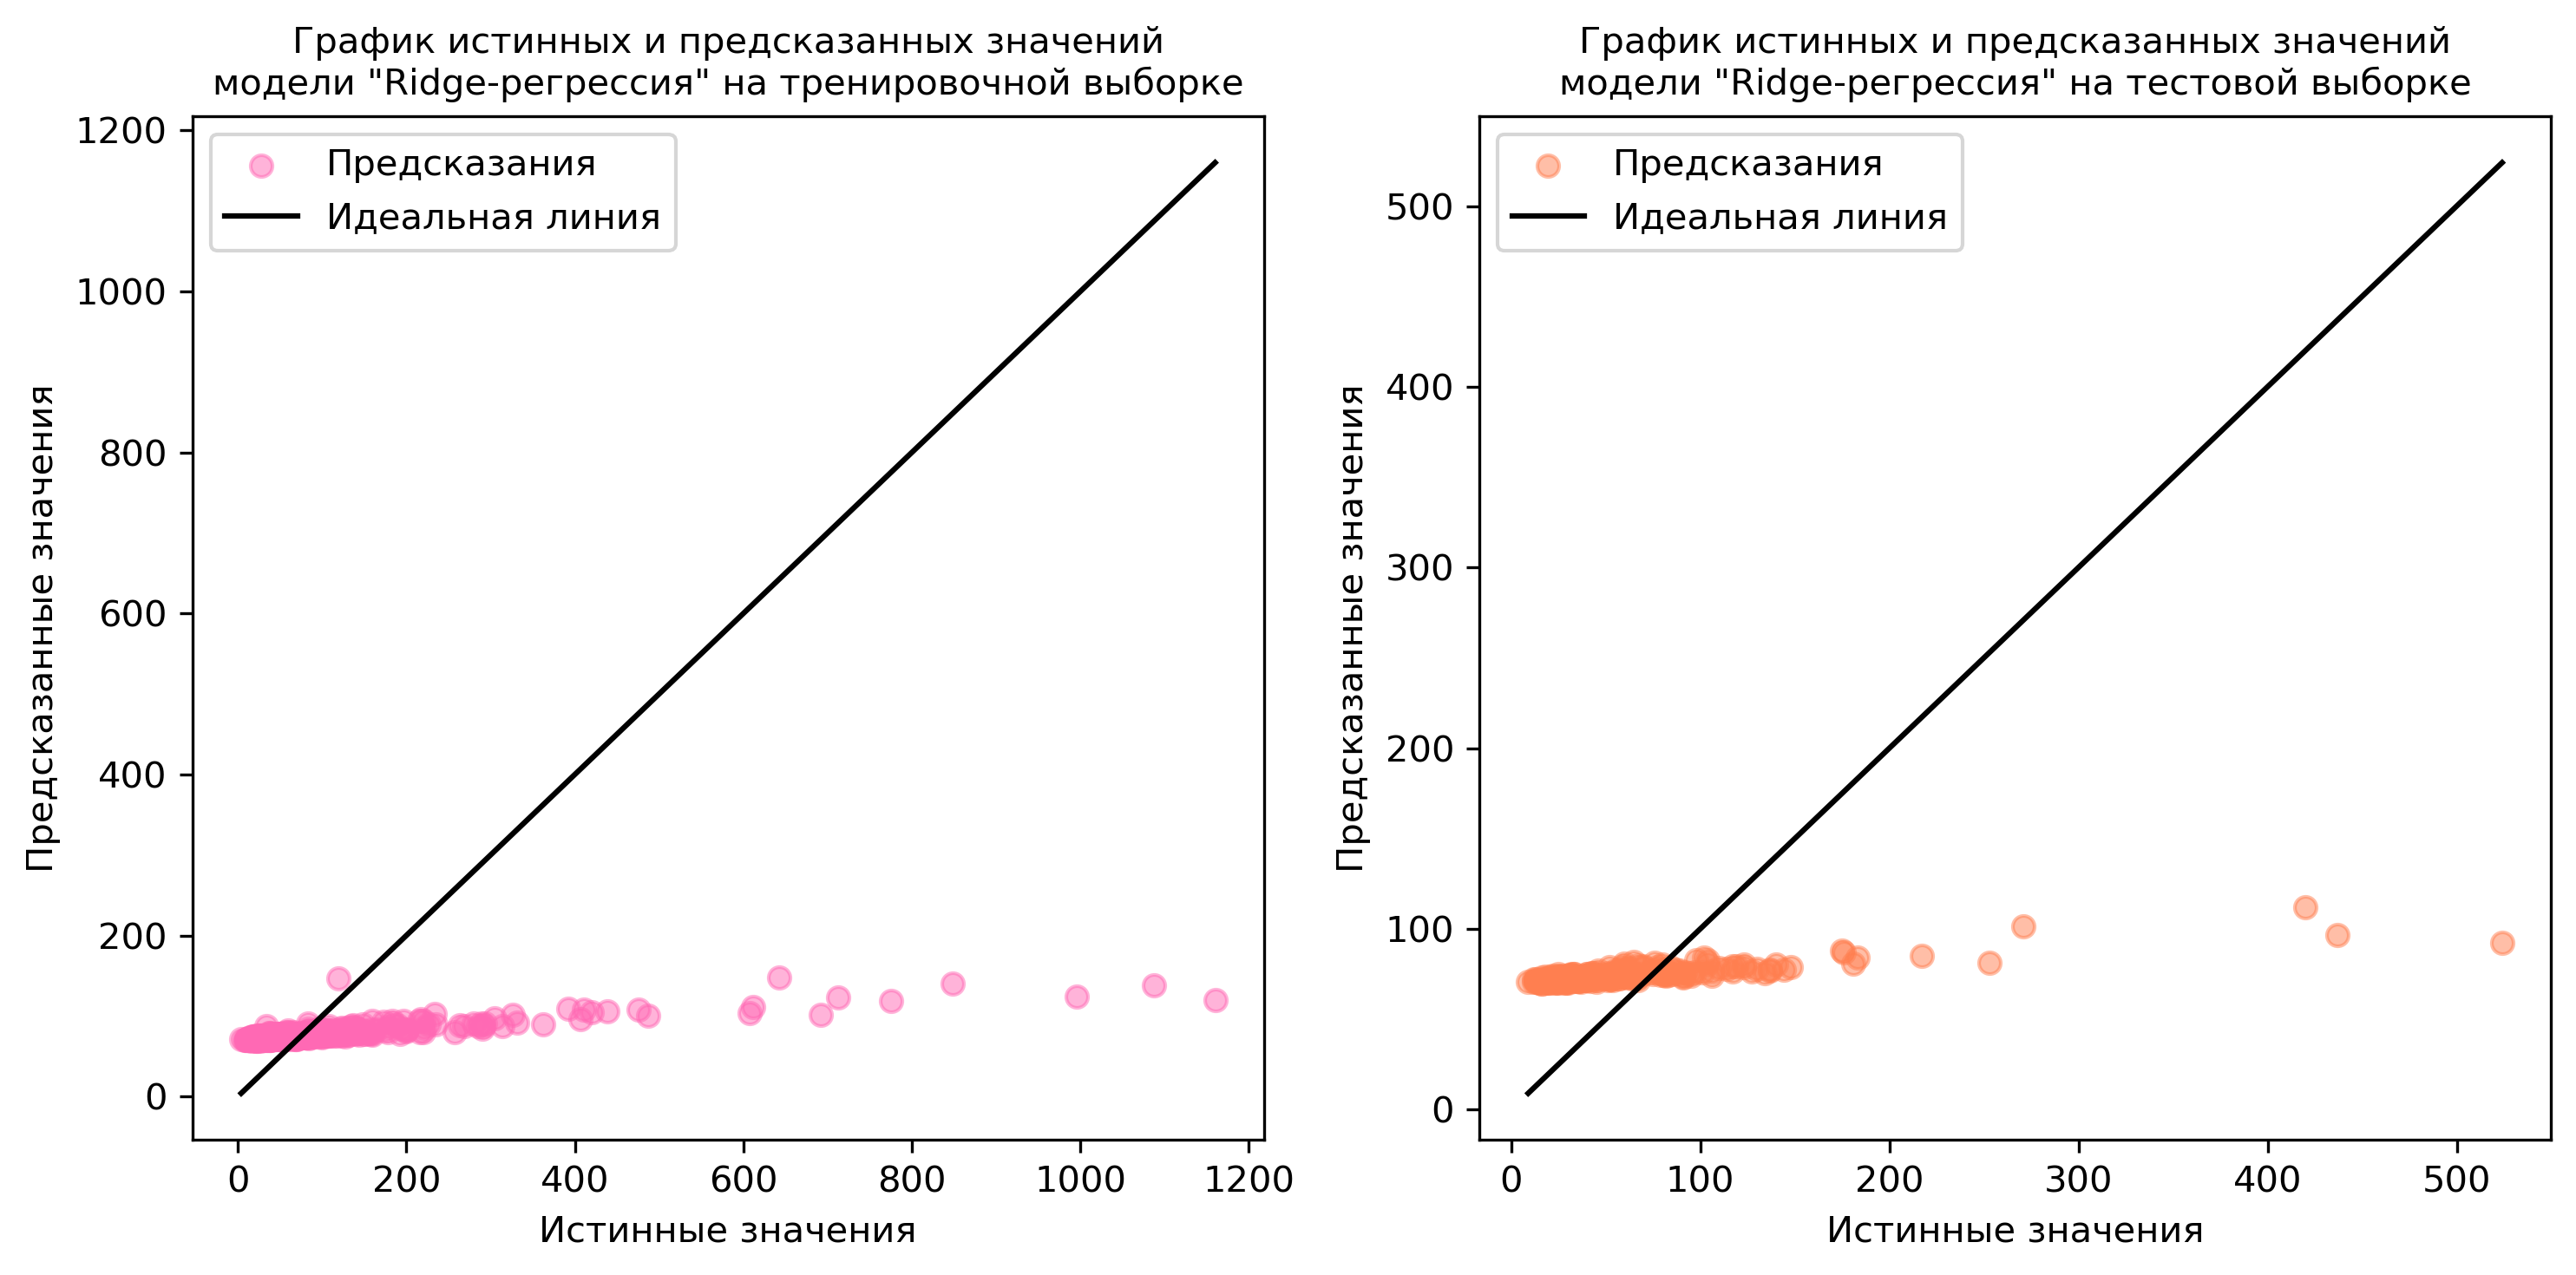

In [56]:
plot_builder(y_test, y_train, y_pred_1, y_train_1, "Ridge-регрессия")

# Lasso - регрессия

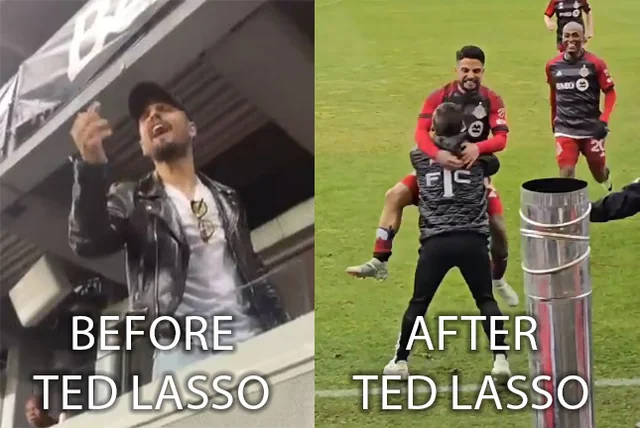

**#Отсылка на сериал оправдана**

In [57]:
#импортируем Lasso регрессию
from sklearn.linear_model import Lasso

In [58]:
lasso = Lasso()

Облегчим себе жизнь, сразу выбрав оптимальный параметр альфа

In [59]:
#для этого импортируем гридсерч
from sklearn.model_selection import GridSearchCV

In [60]:
#создадим словрик, который будем использовать при переборе параметров альфа для Lasso
param_grid = {'alpha': np.arange(1, 100, 2)}

#создадим grid_search, с помощью которого найдем оптимальное значения параметра альфа
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
#установим модель Lasso, 5-кратную кросс-валидацию и метрику MSE для сравненпия параметров

grid_search.fit(X_train_l, y_train) #обучим модель

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             scoring='neg_mean_squared_error')

In [61]:
#через метод best_params_ найдем оптимальное значение параметра альфа
best_alpha = grid_search.best_params_['alpha']
print("Оптимальное значение alpha: ", best_alpha)

Оптимальное значение alpha:  1


In [62]:
#объявиди модель с силой альфой = 1
lasso = Lasso(alpha=1)

#обучили модель
lasso.fit(X_train_l, y_train)

#предсказали результат на тестовой выборке
y_pred_lasso = lasso.predict(X_test_l)

#предсказали результат на тестовой выборке
y_pred_lasso_t = lasso.predict(X_train_l)

In [63]:
mean_squared_error(y_test, y_pred_lasso).round(3)

1649.141

In [64]:
mean_squared_error(y_train, y_pred_lasso_t).round(3)

3506.86

In [65]:
mean_absolute_error(y_test, y_pred_lasso).round(3)

29.894

In [66]:
mean_absolute_error(y_train, y_pred_lasso_t).round(3)

32.221

In [67]:
r2_score(y_test, y_pred_lasso).round(3)

0.548

In [68]:
r2_score(y_train, y_pred_lasso_t).round(3)

0.627

Визуализируем нашу модель

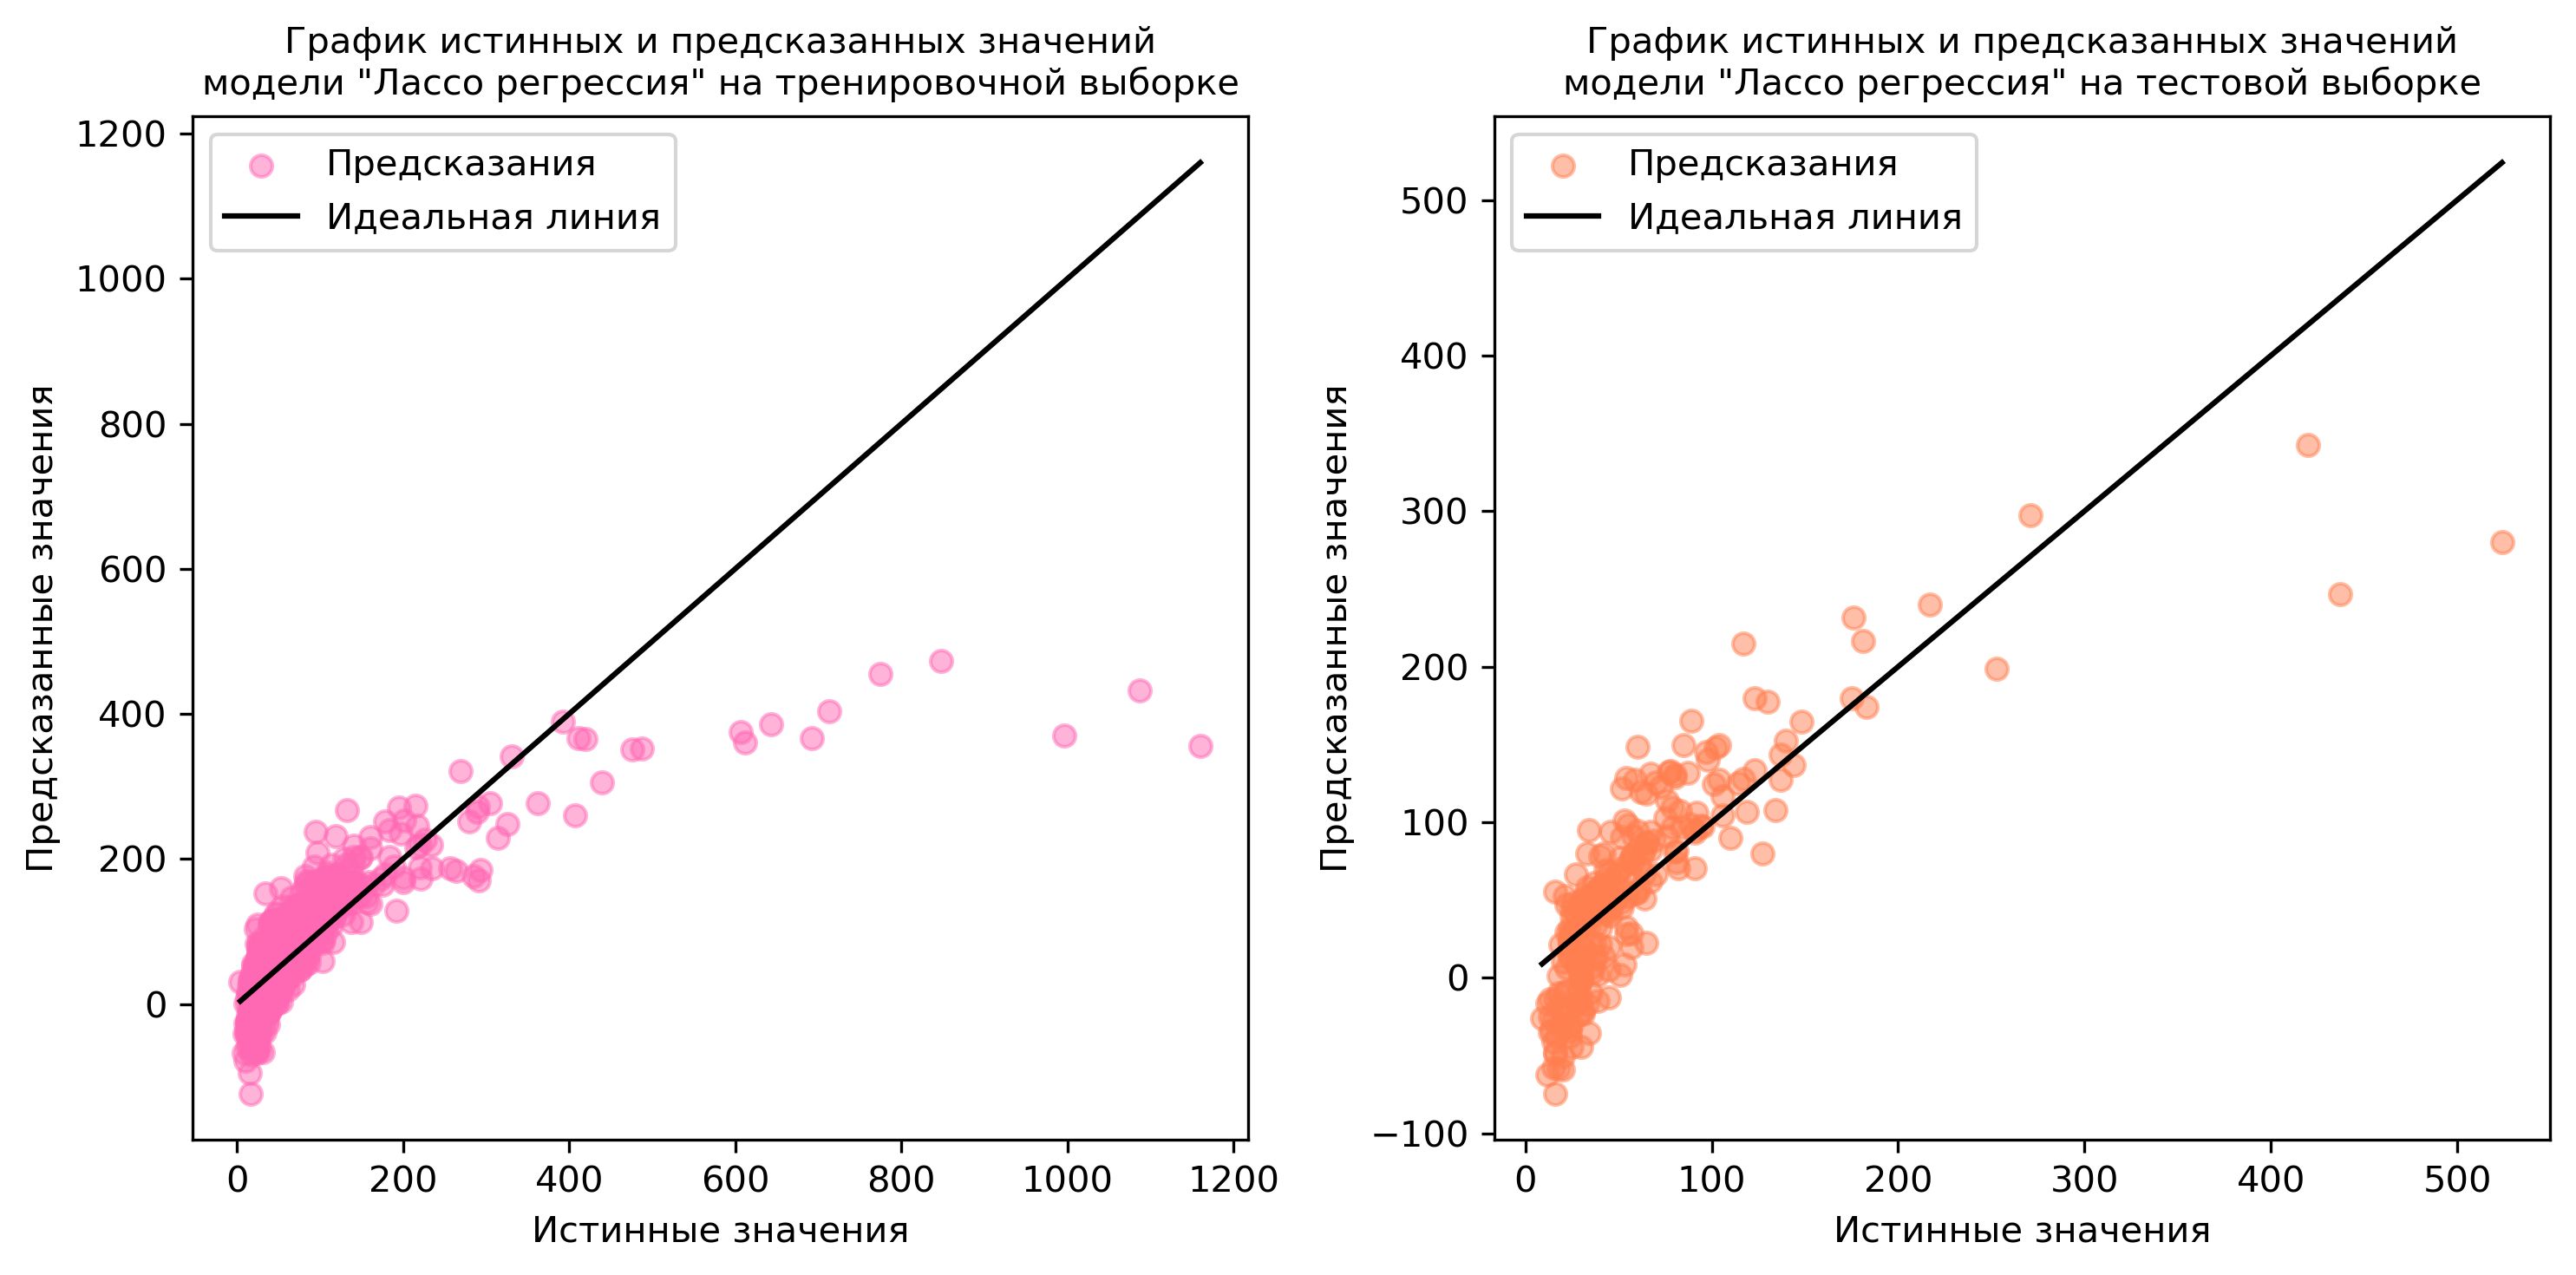

In [69]:
plot_builder(y_test, y_train, y_pred_lasso, y_pred_lasso_t, "Лассо регрессия")

**Метрики качества для `тренировочной выборки`:**
- `MSE` = 3506.86
- `MAE` = 32.22
- `R2` = 0.63

**Метрики качества для `тестовой выборки`:**
- `MSE` = 1649.14
- `MAE` = 29.89
- `R2` = 0.55

**Модель `лассо-регрессии` позволила улучшить** (хоть и незначительно) **метрики качества** по сравнению с линейной регрессией!

# Random Forest

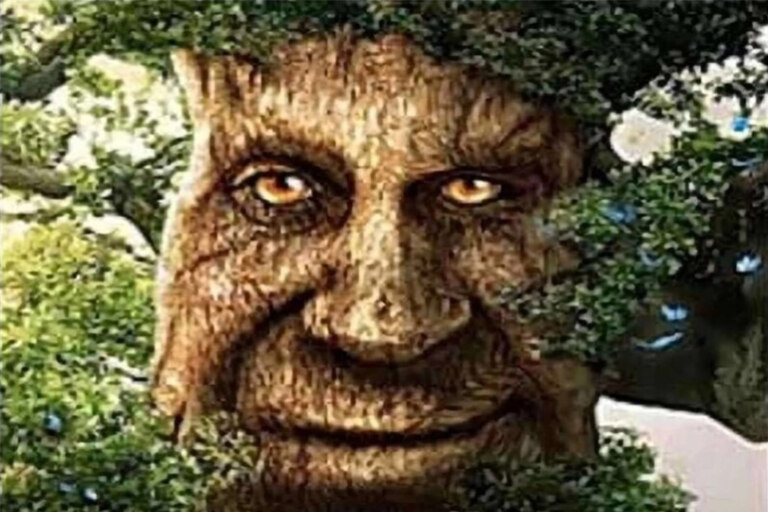

**`Random Forest`** - это алгоритм машинного обучения, который используется для классификации  и регрессии. *В нашем проекте мы будем использовать случайный лес для регрессии.*


**Преимущества модели Random Forest:**
- Высокая точность
- Устойчивость к переобучению
- Способность работать с большими наборами данных

**Недостатки модели Random Forest:**
- Время обучения
- Сложность интерпретации

In [70]:
#подгружаем модель
from sklearn.ensemble import RandomForestClassifier

In [71]:
#объявляем модель
rf_model = RandomForestClassifier()

In [72]:
#снова будем определять оптимальные параметры
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

#подбираем оптимальные параметры
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_l, y_train)

#вот они наши красавцы
best_params = grid_search.best_params_
best_params

{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 150}

In [73]:
#обучаем модель при оптимальных параметрах
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_l, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=150)

In [74]:
#предсказываем тестовую выборку
y_pred_rf = best_rf_model.predict(X_test_l)

#предсказываем тренировочную выборку
y_pred_rf_t = best_rf_model.predict(X_train_l)

Рассчитаем метрики качества

In [75]:
mean_squared_error(y_test, y_pred_rf).round(3)

3572.365

In [76]:
mean_squared_error(y_train, y_pred_rf_t).round(3)

4589.821

In [77]:
mean_absolute_error(y_test, y_pred_rf).round(3)

26.93

In [78]:
mean_absolute_error(y_train, y_pred_rf_t).round(3)

26.249

In [79]:
r2_score(y_test, y_pred_rf).round(3)

0.02

In [80]:
r2_score(y_train, y_pred_rf_t).round(3)

0.512

Визуализируем наш лес

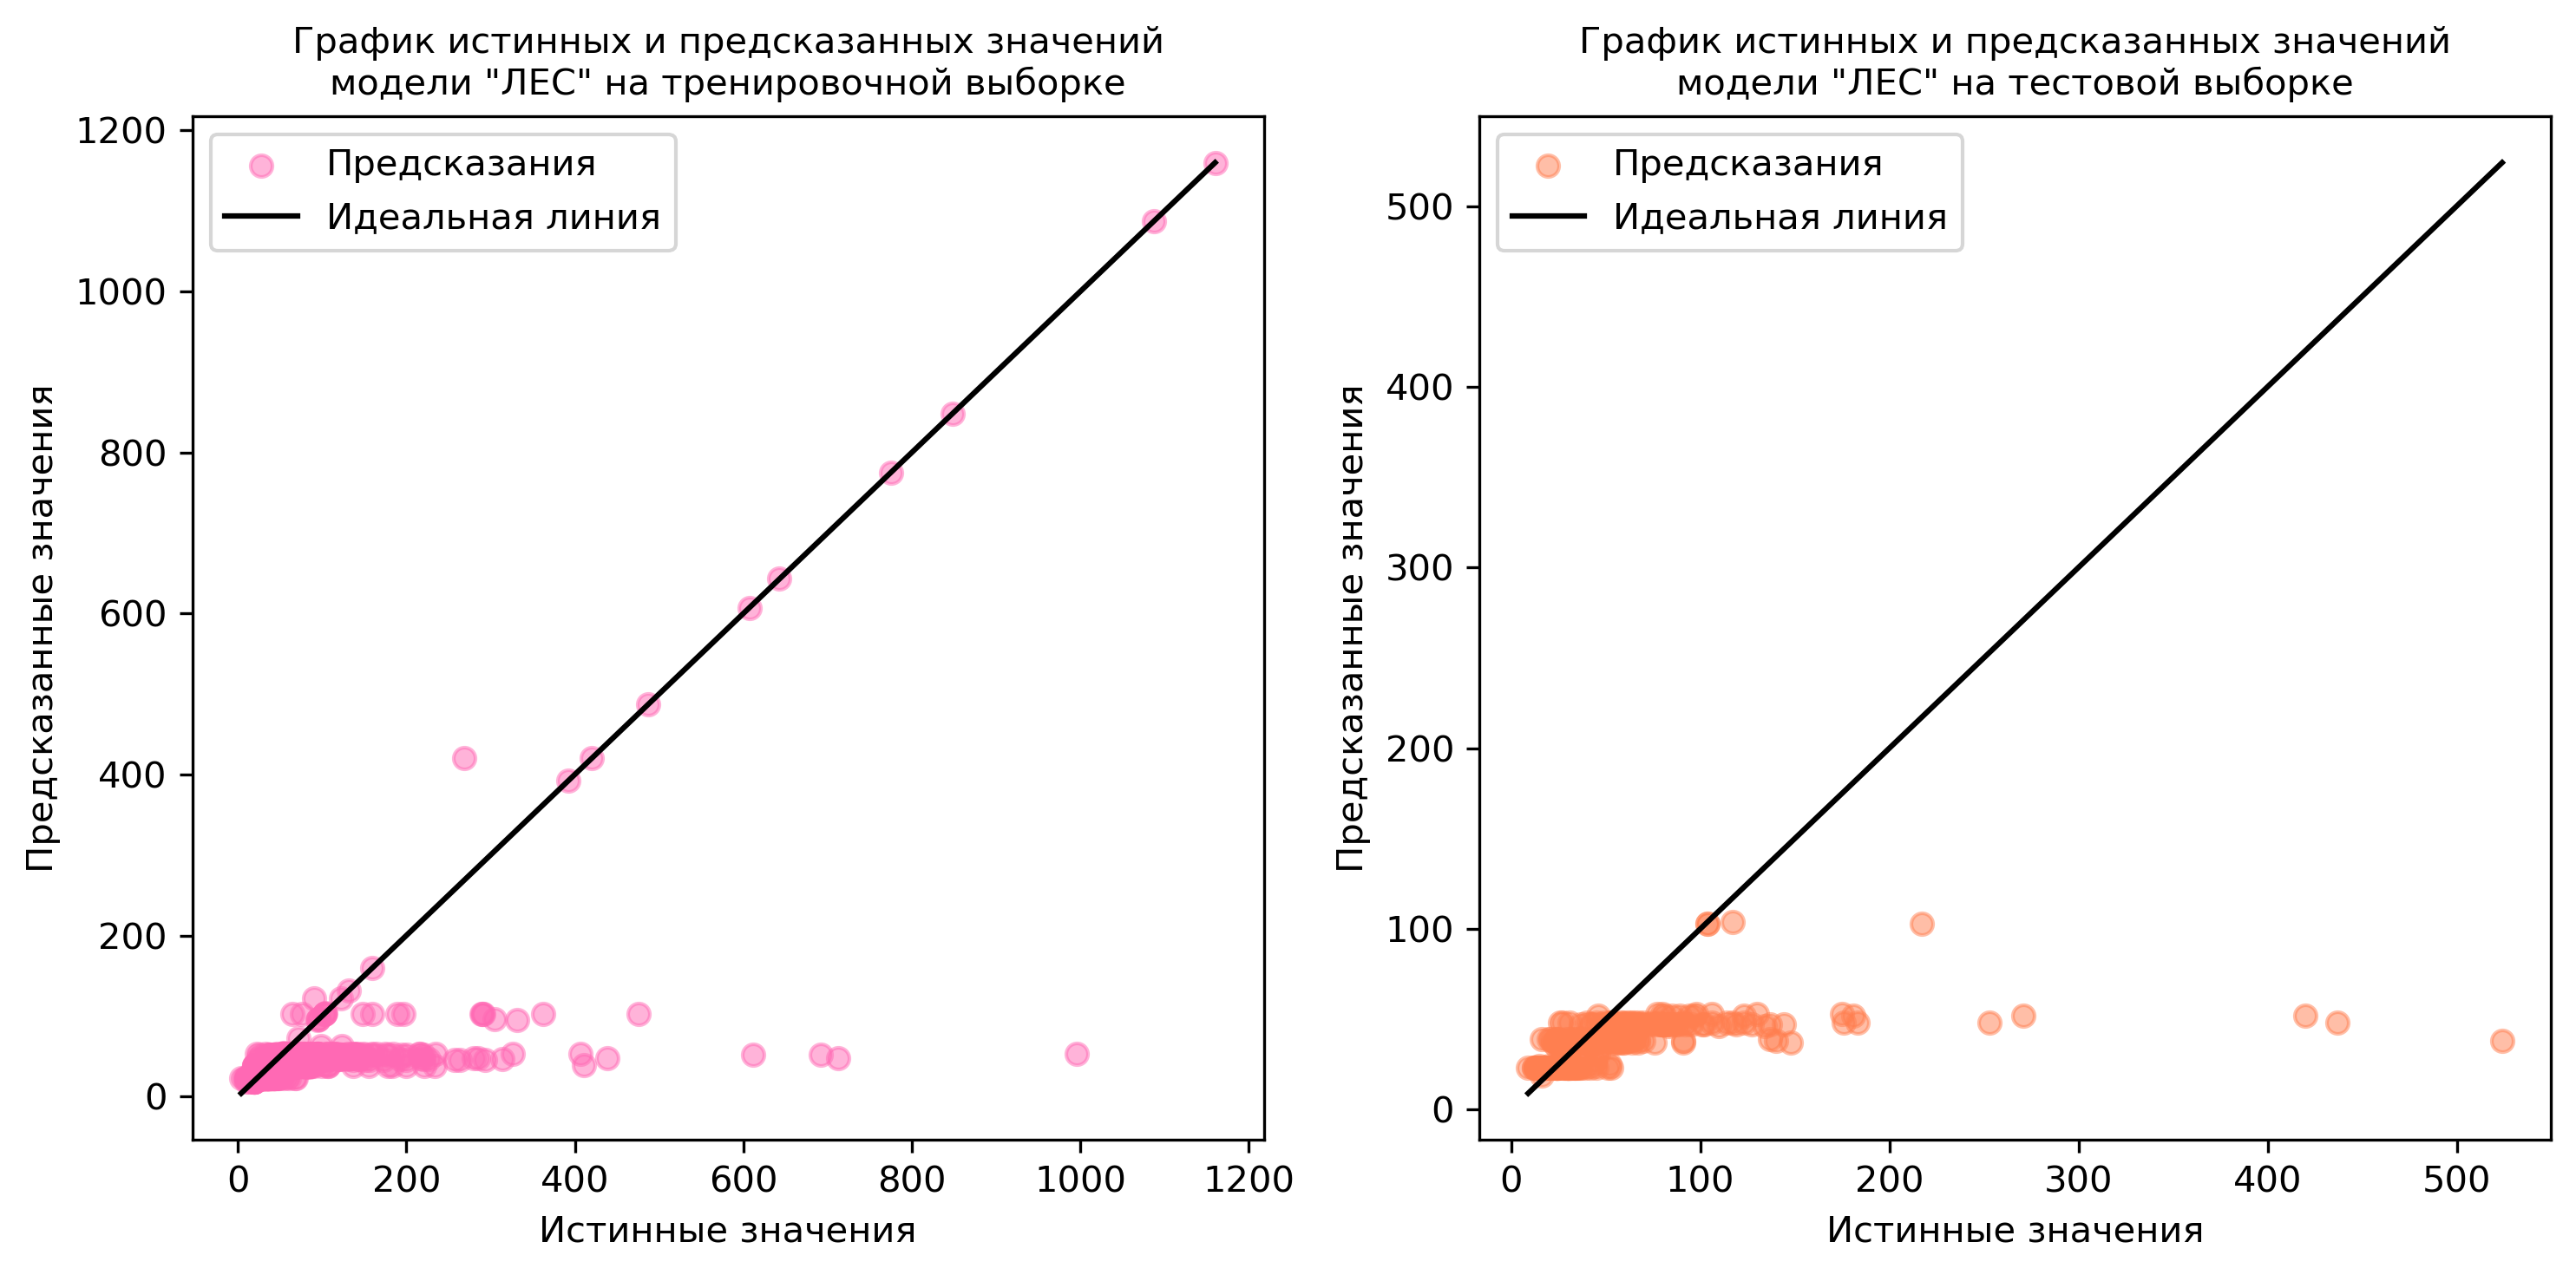

In [81]:
plot_builder(y_test, y_train, y_pred_rf, y_pred_rf_t, "ЛЕС")

**Метрики качества для `тренировочной выборки`:**
- `MSE` = 4414.78
- `MAE` = 26.16
- `R2` = 0.53

**Метрики качества для `тестовой выборки`:**
- `MSE` = 3245.89
- `MAE` = 27.24
- `R2` = 0.11

`Случайный лес` хоть и улучшил некоторые метрики качества, **`лассо регрессия` в целом справляется лучше с предсказанием нашей целевой переменной `likes`**

# Сравнительная характеристика качества использованных моделей

Для более простого сравнения моделей напишем код, который сравнит модели по полученным метрикам. Для этого сформируем словарь:

In [82]:
models_dict={
     'Наивный прогноз': {
        'MSE_train': 9398.38,
        'MAE_train': 45.53,
        'R^2_train':0.0,
        'MSE_test': 3704.37,
        'MAE_test': 38.41,
        'R^2_test':-0.016
    },
    'Линейная регрессия': {
        'MSE_train': 3478.25,
        'MAE_train': 33.03,
        'R^2_train': 0.63,
        'MSE_test':  1734.69,
        'MAE_test': 31.09,
        'R^2_test':  0.52
    },
    'Ridge-регрессия': {
        'MSE_train': 8257.11,
        'MAE_train': 46.24,
        'R^2_train': 0.071,
        'MSE_test': 3387.01,
        'MAE_test': 39.57,
        'R^2_test': 0.12
    },
    'Lasso-регрессия': {
        'MSE_train':  3506.86,
        'MAE_train': 32.22,
        'R^2_train':  0.63,
        'MSE_test': 1649.14,
        'MAE_test': 29.89,
        'R^2_test': 0.55
    },
    'Random forest': {
        'MSE_train': 4414.78,
        'MAE_train': 26.16,
        'R^2_train': 0.53,
        'MSE_test': 3245.89,
        'MAE_test': 27.24,
        'R^2_test': 0.11
    }
}
df = pd.DataFrame(models_dict).T

In [83]:
best_res=[]
for i in ['MSE_train','MAE_train','MSE_test', 'MAE_test']:
    best_res.append(df[i].idxmin())
for j in  ['R^2_train','R^2_test']:
    best_res.append(df[i].idxmax())
most_common = Counter(best_res).most_common()[0][0]
print(f'Лучше всего модель отражает: {most_common}')

Лучше всего модель отражает: Random forest


Но стоит обратить внимание, что  Random Forest лучше справляется с данными с точки зрения минимизации ошибок, с описанием данных **лучше всего справляется Lasso-регресиия**, у которой R^2 наибольшая.

# Выводы

Итак, обучив наши данные с помощью различных моделей, мы пришли к выводу, что лучше всего популярность постов, измеряемую в likes, по их храктеристикам удаётся предсказать, используя линейную регрессию или Lasso-регрессию. 

Оценивая модели с точки зрения их метрик качества, то лучше всего с минимизацией MSE и MAE справляется Random Forest, но с точки зрения описания данных выигрывают линейная регрессия и Lasso-регрессия. Кроме того, выше было доказано, что Lasso-регрессия позволяет хоть и немного, но улучшить результаты, полученные в линейной регрессии. 

Именно поэтому лучшей из представленных моделей для наших данных мы считаем **Lasso-регрессию**.